In [46]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [47]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [66]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [49]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [50]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [51]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [78]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [53]:
# Create our session (link) from Python to the DB

session=Session(engine)

# Exploratory Precipitation Analysis

In [54]:
# most_recent_date = session.query(measurement).first()
# most_recent_date.__dict__

In [55]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date=most_recent_date[0]
print(most_recent_date)

2017-08-23


<Axes: >

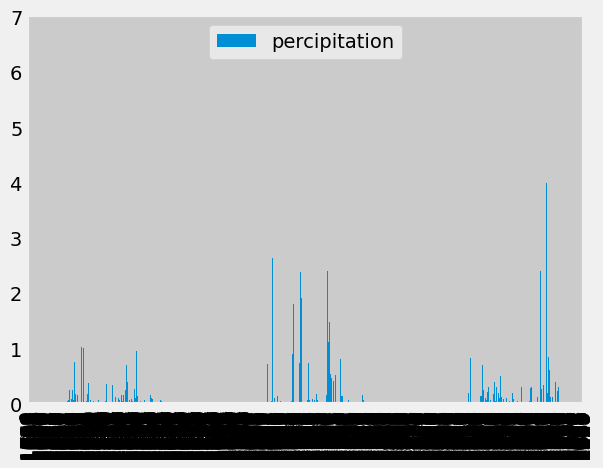

In [187]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date=dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.
year_ago_date =recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = []
data = session.query(measurement.date,measurement.prcp)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results =[]
results = data.filter(measurement.date>=year_ago_date).all()
results_df = pd.DataFrame(results,columns=('date','percipitation'))
results_df.set_index(results_df['date'],drop = True)

# Sort the dataframe by date
results_df=results_df.sort_values('date')
#Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(kind='bar',linewidth = 120)


In [57]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2230 non-null   object 
 1   percipitation  2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.0+ KB


In [58]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df['percipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: percipitation, dtype: float64

# Exploratory Station Analysis

In [60]:
# Design a query to calculate the total number of stations in the dataset
station_q_count = session.query(station).count()
station_q_count

9

In [80]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [81]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [107]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.id,measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active_stations

[(12188, 'USC00519281', 2772),
 (1, 'USC00519397', 2724),
 (2725, 'USC00513117', 2709),
 (9519, 'USC00519523', 2669),
 (16939, 'USC00516128', 2612),
 (5434, 'USC00514830', 2202),
 (14960, 'USC00511918', 1979),
 (7636, 'USC00517948', 1372),
 (9008, 'USC00518838', 511)]

In [139]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(measurement.id,measurement.station,func.count(measurement.station),func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active_station[0]

(14261, 'USC00519281', 2772, 54.0, 85.0, 71.66378066378067)

Text(0.5, 0, 'Temperature')

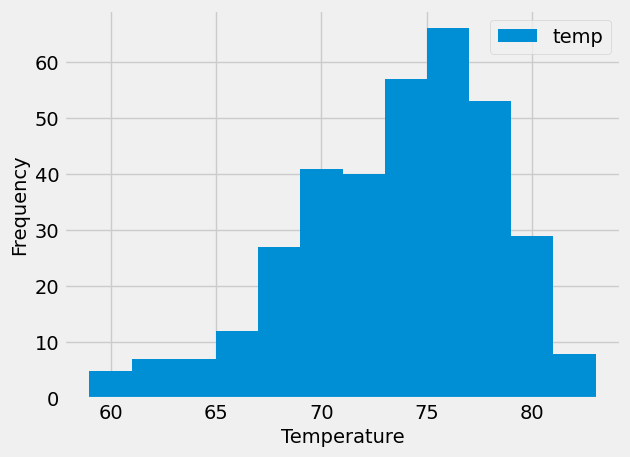

In [161]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station = most_active_station[0][measurement.station]
 
active_station_q = session.query(measurement.station,measurement.date,measurement.tobs).filter(measurement.station==active_station).filter(measurement.date>=year_ago_date).all()
active_station_q

asq_df = pd.DataFrame(active_station_q,columns=('station','date','temp'))

asq_df.plot(kind='hist',bins=12)
plt.xlabel('Temperature')

# Close Session

In [16]:
# Close Session
session.close()